# Homework 4 - Algorithmic Methods of Data Mining
Anthony Giusti - M. Hassan - Amalnath Anilkumar - Braulio Villalobos

# 2. Grouping songs together!

We play with a dataset gathering songs from the International Society for Music Information Retrieval Conference. The tracks (songs) include much information. We focus on the track information, features (extracted with librosa library from Python) and audio variables provided by Echonest (now Spotify).

The final goal is to group songs into similar genres, therefore DO NOT use the feature genre in your k-means anaylsis

To solve this task, you must accomplish the next stages:

### 2.1 Getting your data!

Access to the data can be found here:
* echonest.csv
* features.csv
* tracks.csv

Data Scientists are often challenged to do Data Wrangling. The latter is a process of cleaning and unifying messy and complex data sets for easy access and analysis (see more info here). You are supposed to create one single data set by merging tracks.csv, features.csv and echonest.csv. It's your job to find the correct key to join your data sets together. You should end up with a data set of ~13K rows.

In [27]:
#Packages Import
import csv
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Read Data
echonest = pd.read_csv('echonest.csv')
features = pd.read_csv('features.csv')
tracks = pd.read_csv('tracks.csv')

In [3]:
echonest.shape, features.shape, tracks.shape

((13129, 250), (106574, 519), (106574, 53))

#### ***************** ECHONEST DATASET **********************

In [4]:
echonest.head()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


In [5]:
echonest.track_id.nunique()

13129

In [6]:
echonest.describe()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_latitude,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,9770.000000,...,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761,39.961892,...,-1.966002,10.745951,0.308984,0.255381,0.163876,0.068526,4.183428,4.114902,7.605432,138.932366
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028,15.554275,...,1.708499,20.053146,0.140164,0.083731,3.484144,0.010930,4.967481,4.967004,6.444884,225.584951
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010,-45.867100,...,-17.966162,-1.867880,0.129023,0.098280,0.000518,0.060000,0.322180,0.224580,-3.566834,-1.687834
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321,37.784827,...,-2.587326,1.229409,0.242371,0.208750,0.021321,0.063080,1.817050,1.749660,2.866906,15.565598
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743,40.781400,...,-1.565120,4.355214,0.286014,0.242745,0.042146,0.064490,3.094060,3.026260,5.502340,55.874954
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575,47.254575,...,-0.875471,11.407599,0.339086,0.285305,0.087516,0.070070,5.147530,5.079770,10.597994,175.938553
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,68.927500,...,1.663782,423.621094,5.211423,1.680570,375.744781,0.342000,226.326767,226.244080,67.041878,4790.696777


In [7]:
echonest_cols = echonest.columns.tolist()
#[e for e in enumerate(echonest_cols)]
echonest_cols_interest = echonest_cols[:26]

In [8]:
echonest_cols_interest

['track_id',
 'audio_features_acousticness',
 'audio_features_danceability',
 'audio_features_energy',
 'audio_features_instrumentalness',
 'audio_features_liveness',
 'audio_features_speechiness',
 'audio_features_tempo',
 'audio_features_valence',
 'metadata_album_date',
 'metadata_album_name',
 'metadata_artist_latitude',
 'metadata_artist_location',
 'metadata_artist_longitude',
 'metadata_artist_name',
 'metadata_release',
 'ranks_artist_discovery_rank',
 'ranks_artist_familiarity_rank',
 'ranks_artist_hotttnesss_rank',
 'ranks_song_currency_rank',
 'ranks_song_hotttnesss_rank',
 'social_features_artist_discovery',
 'social_features_artist_familiarity',
 'social_features_artist_hotttnesss',
 'social_features_song_currency',
 'social_features_song_hotttnesss']

#### ************** FEATURES DATASET ******************

In [9]:
features.head()

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [11]:
[e for e in enumerate(features)]

[(0, 'track_id'),
 (1, 'chroma_cens_kurtosis_01'),
 (2, 'chroma_cens_kurtosis_02'),
 (3, 'chroma_cens_kurtosis_03'),
 (4, 'chroma_cens_kurtosis_04'),
 (5, 'chroma_cens_kurtosis_05'),
 (6, 'chroma_cens_kurtosis_06'),
 (7, 'chroma_cens_kurtosis_07'),
 (8, 'chroma_cens_kurtosis_08'),
 (9, 'chroma_cens_kurtosis_09'),
 (10, 'chroma_cens_kurtosis_10'),
 (11, 'chroma_cens_kurtosis_11'),
 (12, 'chroma_cens_kurtosis_12'),
 (13, 'chroma_cens_max_01'),
 (14, 'chroma_cens_max_02'),
 (15, 'chroma_cens_max_03'),
 (16, 'chroma_cens_max_04'),
 (17, 'chroma_cens_max_05'),
 (18, 'chroma_cens_max_06'),
 (19, 'chroma_cens_max_07'),
 (20, 'chroma_cens_max_08'),
 (21, 'chroma_cens_max_09'),
 (22, 'chroma_cens_max_10'),
 (23, 'chroma_cens_max_11'),
 (24, 'chroma_cens_max_12'),
 (25, 'chroma_cens_mean_01'),
 (26, 'chroma_cens_mean_02'),
 (27, 'chroma_cens_mean_03'),
 (28, 'chroma_cens_mean_04'),
 (29, 'chroma_cens_mean_05'),
 (30, 'chroma_cens_mean_06'),
 (31, 'chroma_cens_mean_07'),
 (32, 'chroma_cens_mean_0

In [12]:
features.track_id.nunique()

106574

#### ************** TRACKS DATASET ******************

In [13]:
tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [14]:
tracks.describe()

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,artist_latitude,artist_longitude,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_listens,track_number
count,106574.000000,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000,106574.000000,106574.000000,44544.000000,44544.000000,106574.000000,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000
mean,79442.637435,0.394946,1.286927,12826.933914,3.212031e+04,19.721452,1.894702,30.041915,12036.770404,39.901626,-38.668642,263274.695048,0.031621,277.849100,3.182521,3.541310e+03,2329.353548,8.260945
std,44704.398384,2.268915,3.133035,6290.261805,1.478532e+05,39.943673,6.297679,100.511408,6881.420867,18.240860,65.237220,67623.443584,0.321993,305.518553,13.513820,1.901743e+04,8028.070647,15.243271
min,2.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1.000000,-45.878760,-157.526855,-1.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,40820.250000,0.000000,0.000000,7793.000000,3.361000e+03,7.000000,0.000000,1.000000,6443.000000,39.271398,-79.997459,192000.000000,0.000000,149.000000,0.000000,5.990000e+02,292.000000,2.000000
50%,78983.500000,0.000000,0.000000,13374.000000,8.982000e+03,11.000000,0.000000,5.000000,12029.500000,41.387917,-73.554431,299914.000000,0.000000,216.000000,1.000000,1.314000e+03,764.000000,5.000000
75%,119422.750000,0.000000,1.000000,18203.000000,2.363500e+04,17.000000,1.000000,16.000000,18011.000000,48.856930,4.351710,320000.000000,0.000000,305.000000,3.000000,3.059000e+03,2018.000000,9.000000
max,155320.000000,53.000000,61.000000,22940.000000,3.564243e+06,652.000000,79.000000,963.000000,24357.000000,67.286005,175.277000,448000.000000,37.000000,18350.000000,1482.000000,3.293557e+06,543252.000000,255.000000


In [15]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_id                  106574 non-null  int64  
 1   album_comments            106574 non-null  int64  
 2   album_date_created        103045 non-null  object 
 3   album_date_released       70294 non-null   object 
 4   album_engineer            15295 non-null   object 
 5   album_favorites           106574 non-null  int64  
 6   album_id                  106574 non-null  int64  
 7   album_information         83149 non-null   object 
 8   album_listens             106574 non-null  int64  
 9   album_producer            18060 non-null   object 
 10  album_tags                106574 non-null  object 
 11  album_title               105549 non-null  object 
 12  album_tracks              106574 non-null  int64  
 13  album_type                100066 non-null  o

In [16]:
# 106.574 different track ids
tracks.track_id.nunique()

106574

#### What's the link between these sets?

So as we saw with the exploratory data analysis, the echonest dataset has 13.129 unique track_ids, while the features and tracks dataset have 106.574 unique tracks_id. Since the 3 datasets have this field in common, we decided to use the 'track_id' as a key to join the datasets. At the end, we will work with approx 13K rows or observations, just as indicated in the homework description. 

* Echonest: has some information about the audio features, metadata, ranks and social features, along with other numerical fields. 
* Features dataset: contains a lot of numerical fields that apparently characterize the tracks. 
* Tracks: it contains a lot of information on the album, the artist and the track. 

#### Unifying the datasets

In [17]:
echonest_df = pd.DataFrame(echonest)
features_df = pd.DataFrame(features)
tracks_df = pd.DataFrame(tracks)

In [18]:
df = echonest_df.merge(features_df, on = 'track_id')
df = df.merge(tracks_df, on = 'track_id')

In [19]:
df.shape

(13129, 820)

In [20]:
df.head()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,NaN,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,NaN,5,NaN,[],Street Music


### ************ Dimensionality Reduction******************

### 1. Features Dataset

We start by applying a PCA to the Features dataset. The reason why we chose to apply this method on this particular dataset is that all the variables are numeric. As PCA is performed on the covariance matrix, we decided that this method was appropiate as we don't need to carry out any conversion of categorical variables into numerical ones. We then proceed to:

* First extract the variables corresponding to the Features dataset
* Normalize the variables
* Apply PCA

#### A) PCA

In [21]:
features_dim_red = features.merge(df[['track_id']])

In [22]:
features_dim_red.shape

(13129, 519)

In [23]:
features_dim_red.iloc[:,:50].describe()

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,chroma_cens_median_04,chroma_cens_median_05,chroma_cens_median_06,chroma_cens_median_07,chroma_cens_median_08,chroma_cens_median_09,chroma_cens_median_10,chroma_cens_median_11,chroma_cens_median_12,chroma_cens_min_01
count,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,...,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,0.140681,0.067709,0.177723,0.061883,0.079323,0.117992,0.075996,0.170159,0.065728,...,0.248416,0.250672,0.239833,0.240035,0.244977,0.248397,0.236079,0.228912,0.225379,0.006546
std,28950.422182,1.593070,1.432496,1.575761,1.150555,1.963091,2.106408,1.403370,4.065834,2.107996,...,0.075810,0.086856,0.078652,0.076461,0.084201,0.077787,0.086800,0.076818,0.083070,0.023146
min,2.000000,-1.922728,-1.905314,-1.925910,-1.914968,-1.841308,-1.764899,-1.794146,-1.700912,-1.781011,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12986.000000,-0.614674,-0.649604,-0.593908,-0.626463,-0.647167,-0.607263,-0.629585,-0.604848,-0.655270,...,0.209685,0.204622,0.199616,0.200788,0.200132,0.206906,0.187666,0.187593,0.178358,0.000000
50%,28097.000000,-0.159293,-0.219846,-0.134305,-0.187820,-0.211127,-0.157157,-0.193361,-0.153645,-0.226539,...,0.244650,0.245376,0.238586,0.238383,0.238907,0.242231,0.232814,0.228957,0.225140,0.000000
75%,45021.000000,0.469450,0.390960,0.524311,0.430300,0.409552,0.471887,0.436058,0.496591,0.407977,...,0.289024,0.296126,0.280434,0.278064,0.285239,0.287616,0.279312,0.269051,0.268715,0.000000
max,124911.000000,48.023846,43.409588,67.386223,20.028009,164.880539,194.719330,73.180061,439.131195,188.034485,...,0.618711,0.735352,0.672450,0.633601,0.654713,0.638823,0.666996,0.628589,0.668156,0.338551


In [24]:
# Checking for missing values
missing_values = features_dim_red.isnull().sum()*100/len(features_dim_red)

In [25]:
missing_values_df = pd.DataFrame({'columns_name':features_dim_red.columns,
                                 'percent_missing': missing_values})

In [26]:
missing_values_df[missing_values_df['percent_missing']!=0]

,columns_name,percent_missing


As the dataset doesn't have any missing values, we don't need to carry out any pre processing like variable imputation and removal. 

##### --Way #2

In [28]:
X = features_dim_red.values
X = scale(X)

In [29]:
pca = PCA(n_components = 100)

In [30]:
my_x = pca.fit_transform(X)

In [31]:
pd.DataFrame(my_x)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.682700,-1.972250,-6.945725,4.123950,1.746503,-6.775712,-0.582245,1.560024,-0.299358,3.423910,...,0.658474,-1.152844,-0.797904,-1.580294,0.386285,0.733468,-0.847161,0.878300,0.705628,0.663525
1,4.549089,-4.679155,-4.245711,-3.105409,1.484379,1.791329,4.217955,4.544034,-1.989591,3.750287,...,0.281522,-0.061356,-0.011037,-0.339348,-0.650645,0.515739,-0.087759,0.223715,-0.270791,-0.828521
2,1.182898,-2.884530,-3.374715,-1.301857,2.106521,0.489544,-0.781680,3.433585,-0.171858,1.558286,...,-0.056892,0.630933,0.713331,-1.143579,0.282111,0.700903,-1.394079,0.684330,-0.395325,-0.885358
3,6.590843,3.982656,-4.903721,-0.756132,1.156982,1.923529,3.046953,4.977126,-2.099016,2.061654,...,-0.221883,0.167820,0.030873,-0.291161,-0.973357,-2.743968,0.787391,-1.561496,-1.788814,1.078935
4,2.088385,-6.698105,-2.549170,-1.129361,-0.662274,0.969942,-2.658423,5.864336,0.522216,0.650098,...,-0.010362,-0.205476,0.140460,-0.306951,0.571598,0.727888,0.261714,-0.716536,-0.852366,0.315505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,6.739351,-4.232906,-0.782725,-2.592593,-0.835962,-1.018602,-1.012761,2.696426,0.816244,2.282039,...,0.200557,0.668439,0.339781,1.099398,-0.262561,-0.852766,0.271207,-1.254967,1.617937,-0.150821
13125,15.975099,-0.179111,-2.460740,6.231222,1.418114,-0.664350,-3.285767,4.680604,-0.128834,-7.635012,...,-0.012415,1.104240,-1.547641,1.408773,1.148791,-1.307021,0.495284,-0.763339,1.856086,0.897997
13126,18.313394,0.265516,-3.400826,1.468165,3.651854,-4.851886,-2.126458,1.269225,2.994914,-3.379609,...,0.519162,0.008719,0.091688,2.030999,0.790068,-0.927838,0.900905,-0.353301,0.804673,-0.417058
13127,-2.875521,-2.425830,-1.424479,-4.194334,-1.283795,-0.838342,6.240139,-0.235910,-0.973233,0.733885,...,0.544246,0.608603,-0.543626,1.038456,-0.227028,-1.190594,0.508091,-1.441316,1.185904,0.450742


In [32]:
var = pca.explained_variance_ratio_

In [33]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)
var1

array([12.04, 19.79, 23.86, 27.06, 29.84, 32.49, 35.11, 37.66, 40.08,
       42.2 , 44.09, 45.85, 47.39, 48.87, 50.26, 51.6 , 52.8 , 53.91,
       54.95, 55.9 , 56.77, 57.59, 58.34, 59.07, 59.78, 60.46, 61.13,
       61.78, 62.39, 62.97, 63.53, 64.05, 64.57, 65.08, 65.56, 66.03,
       66.48, 66.92, 67.35, 67.77, 68.18, 68.59, 68.98, 69.36, 69.73,
       70.09, 70.44, 70.78, 71.12, 71.46, 71.79, 72.12, 72.44, 72.76,
       73.07, 73.37, 73.67, 73.96, 74.25, 74.53, 74.81, 75.09, 75.36,
       75.63, 75.9 , 76.16, 76.42, 76.67, 76.92, 77.17, 77.41, 77.65,
       77.89, 78.12, 78.35, 78.58, 78.81, 79.04, 79.26, 79.48, 79.69,
       79.9 , 80.11, 80.31, 80.51, 80.71, 80.91, 81.11, 81.3 , 81.49,
       81.68, 81.87, 82.05, 82.23, 82.41, 82.58, 82.75, 82.92, 83.09,
       83.26])

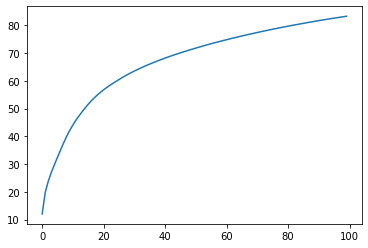

In [34]:
plt.plot(var1)

#### Results interpretation:

PCA allowed us to reduce dimensionality from 519 features to 85 preserving 80.41% of the total variance. Although this represents a decrease of 83.6% in the total number of original features, handling 100 components only for this first dataset is still a high number. For this reason, we will try other methods of dimensionality reduction and test their performance. 

### 2. Echonest Dataset

In [35]:
echonest_df.shape

(13129, 250)

First we make a simple count of the null values, as in a first overseen of the data it appears to be a sparse data. 

In [36]:
missing_values = echonest_df.isnull().sum()*100/len(echonest_df)
missing_values_df = pd.DataFrame({'columns_name':echonest_df.columns,
                                 'percent_missing': missing_values})

In [37]:
(missing_values_df[missing_values_df['percent_missing'] > 0]).sort_values(by = 'percent_missing', ascending = False)

,columns_name,percent_missing
ranks_song_currency_rank,ranks_song_currency_rank,84.515195
ranks_song_hotttnesss_rank,ranks_song_hotttnesss_rank,83.197502
metadata_album_date,metadata_album_date,79.305355
ranks_artist_hotttnesss_rank,ranks_artist_hotttnesss_rank,78.490365
ranks_artist_discovery_rank,ranks_artist_discovery_rank,78.482748
ranks_artist_familiarity_rank,ranks_artist_familiarity_rank,78.482748
metadata_album_name,metadata_album_name,78.124762
metadata_artist_latitude,metadata_artist_latitude,25.584584
metadata_artist_location,metadata_artist_location,25.584584
metadata_artist_longitude,metadata_artist_longitude,25.584584


*Decision*: In the last table we can appreciate there are variables with almost 80% of the data missing. Taking into account that we consider that a variable that has almost 80% of the observations missing, we decide to remove the following variables from the dataset to analyze:

* ranks_song_currency_rank
* ranks_song_hotttnesss_rank
* metadata_album_date
* ranks_artist_hotttnesss_rank
* ranks_artist_discovery_rank
* ranks_artist_familiarity_rank
* metadata_album_name

Additionally, the variables metadata_artist_latitud, metadata_artist_location and metadata_artist_longitude describe the same information which is localization of the artist. Given that the latitude and longitude are numerical values and therefore easier to incorporate in a PCA without carrying out any conversion and also that metadata_artist_location contains similar information, we decided to remove

* the metadata_artist_location 

from the set to analyze. We decide to keep for the moment the metadata_artist_latitude and metadata_artist_longitude despite the fact that they have 25% of the data missing. 

Finally, the variables

* metadata_artist_name
* metadata_release

Are also removed from the dimensionality reduction as they're of string type which are not categorical but describe the name of the artist and the album name. Therefore as they're not numerical and shouldn't be converted to categorical, we decide to leave them out. 

In [38]:
list_to_remove = list(missing_values_df[missing_values_df['percent_missing'] > 78].index)
list_to_remove.append('metadata_artist_location')
list_to_remove.append('metadata_artist_name')
list_to_remove.append('metadata_release')
list_to_remove.append('metadata_artist_latitude')
list_to_remove.append('metadata_artist_longitude')

In [39]:
echonest_df = echonest_df.drop(list_to_remove, axis = 1)
echonest_df.shape

(13129, 238)

#### A) PCA

In [40]:
Y = echonest_df.values
Y = scale(Y)

In [41]:
pca_y = PCA(n_components = 85)

In [42]:
my_y = pca_y.fit_transform(Y)

In [43]:
var2 = np.cumsum(np.round(pca_y.explained_variance_ratio_,decimals = 4)*100)
var2

array([11.37, 20.01, 24.9 , 28.14, 30.89, 33.47, 35.79, 38.06, 40.24,
       42.24, 44.12, 45.91, 47.68, 49.35, 50.97, 52.55, 53.96, 55.35,
       56.7 , 57.95, 59.14, 60.28, 61.33, 62.33, 63.32, 64.27, 65.2 ,
       66.09, 66.95, 67.78, 68.58, 69.32, 70.03, 70.73, 71.42, 72.11,
       72.78, 73.42, 74.06, 74.69, 75.3 , 75.87, 76.43, 76.97, 77.51,
       78.04, 78.56, 79.07, 79.58, 80.06, 80.53, 80.99, 81.45, 81.9 ,
       82.35, 82.79, 83.21, 83.63, 84.04, 84.44, 84.83, 85.22, 85.6 ,
       85.97, 86.33, 86.68, 87.03, 87.36, 87.69, 88.  , 88.3 , 88.59,
       88.87, 89.14, 89.41, 89.67, 89.93, 90.19, 90.44, 90.68, 90.92,
       91.15, 91.38, 91.6 , 91.82])

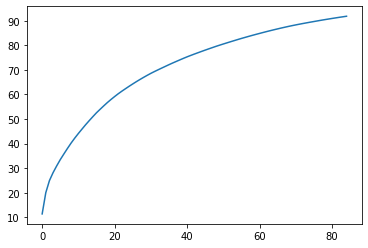

In [44]:
plt.plot(var2)

Results interpretation: 

If we take 50 components, we account for slightly more than 80% of the total variance. In this way, we reduce the dimensionality in 79% as we had initially -after removing the variables with null values- 239 variables and we are left with 50 components. 

### 3. Tracks Dataset

We start by counting the null values in the dataset

In [45]:
tracks_df = tracks.merge(df[['track_id']])
tracks_df.shape

(13129, 53)

* track_lyricist: removed since almost all observations of this variable are filled with null values. 
* track_publisher: removed since almost all observations of thie variable are filled with null values. 
* track_information: removed since the variable is filled almost filly by null values. Additionally, the data contained doesn't give any additional useful information to the clustering. 
* track_composer: removed since almost all the observations are filled with null values. With the observations that are not filled with null values, there're 505 unique composers. However some of them refer to the same composer with an additional collaboration, which means that if we parse this variable, we would have less than 505 categories. 
* artist_active_year_end: removed since almost all observations are filled with null values.
* artist_wikipedia_page: removed as this variable won't give us any additional useful information and almost all observations are filled with null values. 
* track_date_recorded: removed since almost all observations are filled with null values
* artist_related_projects: removed due to the number of null values
* album_information: removed as the variable is filled with text that can't be converted into categories. An additional analysis should be carried out if we were interested in extracting useful information from this field. 
* artist_associated_labels: removed as not only the variable is null for the 86% of observations but also because it contains text information which needs an special process to parse it into categorical values in case we decided to use it. Since it's a complicated process to just obtain additional information for 14% of the total observations, we decide to remove the variable.
* album_engineer: removed as not only a lot of variables have null values but also as the variable contains strings with 622 unique categories, which in some cases correspond to the same engineer but written differently. The process to clean this data surpasses the potential additional information we could gather, as 86% of the observations have null values. 
* album_producer: removed for the same reasons as album_engineer variable
* artist_active_year_being: 76 unique categories but a significant number of them have null values. 
* artist_latitude & artist_longitude: 
* artist_location: has 34% of null variables. Will be removed in the initial analysis but could be used to impute the language which has 86% of null values.
* artist_bio: removed as it's made of texts which can't be converted into categorical values
* artist_website: removed as it contains the link to the artist website, which won't be useful as long as we don't carry out another type of analysis. 
* album_information: removed as it contains texts which can't be converted into categorical variables.


*
*
*
*






* track_genre_top: is the variable of interest to cluster by. It has 16 unique categories. MUST BE REMOVED FROM THE DIMENSIONALITY REDUCTION. 
* album_type: can be converted into categorical variables to analyze.
* track_language_code: despite having a lot of null values, can be parsed as a categorical value as long as we carry out an imputation process for the missing values. 
* artist_members: 4015 different categories
* album_information: could be converted into categorical variables.



In [46]:
missing_values_t = (tracks_df.isnull().sum()*100/len(tracks_df))
missing_values_t = pd.DataFrame({'columns_name': tracks_df.columns,
                                'percent_missing': missing_values_t})

missing_values_t[missing_values_t['percent_missing']>0].sort_values(by = "percent_missing", ascending = False)

,columns_name,percent_missing
track_lyricist,track_lyricist,99.436362
track_publisher,track_publisher,98.842258
artist_active_year_end,artist_active_year_end,96.237337
track_composer,track_composer,96.008835
track_information,track_information,93.761901
artist_wikipedia_page,artist_wikipedia_page,90.623810
artist_related_projects,artist_related_projects,86.716429
artist_associated_labels,artist_associated_labels,82.809049
track_date_recorded,track_date_recorded,81.605606
album_engineer,album_engineer,77.888643


There is a significant number of variables with null values. In a first attempt we will ignore all these variables regardless of the percentage of null values they have.

In [47]:
variables_to_remove_t = list(missing_values_t[missing_values_t['percent_missing']>0].columns_name.index) #All variables with null values
tracks_var_removed = tracks_df.drop(variables_to_remove_t, axis = 1)

In [48]:
tracks_df.columns

Index(['track_id', 'album_comments', 'album_date_created',
       'album_date_released', 'album_engineer', 'album_favorites', 'album_id',
       'album_information', 'album_listens', 'album_producer', 'album_tags',
       'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin',
       'artist_active_year_end', 'artist_associated_labels', 'artist_bio',
       'artist_comments', 'artist_date_created', 'artist_favorites',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_members', 'artist_name', 'artist_related_projects',
       'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split',
       'set_subset', 'track_bit_rate', 'track_comments', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_duration',
       'track_favorites', 'track_genre_top', 'track_genres',
       'track_genres_all', 'track_information', 'track_interest',
       'track_language_code', 'track_license', 'track_listens',
  

Variables with no missing values:

* track_id: removed as it is the identifier of each track to analyze. 
* album comments: removed as it's a categorical value in which more than 77% of the total dataset has album comments. 
* album_favorites: removed as it's a categorical variable. 
* album_id: removed as it's a categorical variable.
* album_tags: removed as it's a categorical variable.
* album_title: removed as it's a categorical variable.
* album_tracks: removed as it's a categorical variable. (this has potential)
* artist_comments: removed as it's a categorical variable.
* artist_favorites: removed as it's a categorical variable
* artist_id: removed as it's a categorical variable
* artis_name: removed as it's a categorical variable
* artist_tags: removed as it's a categorical variable made up of strings. 
* set_split: removed as it's a categorical variable that indicates to which set the observation belongs: training, testing or validation.
* set_subset: removed as it's a categorical variable. However, this could be taken into account for future analyses.
* track_bit_rate: removed as it's not clear what it represents.
* track_comments: removed as it's a categorical variable in which almost all the tracks have 0 comments.
* track_date_created: removed as it's a date. 
* track_bit_
* track_genres: removed 
* track_genres_all: removed
* track_interest:
* track_listens:
* track_number:
* track_tags: removed

In [ ]:
#remove_not_null = ['track_id','album_comments','album_favorites','album_id','album_tags','album_title','album_tracks',
#                  'artist_comments','artist_favorites','artist_id','artist_name','artist_tags','set_split','set_subset',
#                  'track_bit_rate','track_comments','track_date_created','track_genres','track_genres_all','track_tags']

In [49]:
remove_not_null = ['track_id','album_comments','album_id','album_tags','album_title',
                  'artist_id','artist_name','artist_tags','set_split','set_subset',
                  'track_bit_rate','track_comments','track_date_created','track_genres','track_genres_all','track_tags']

In [50]:
tracks_var_removed = tracks_var_removed.drop(remove_not_null, axis = 1)

In [51]:
tracks_var_removed.shape

(13129, 10)

#### *** Dimensionality Reduction***

In [52]:
Z = tracks_var_removed.values
Z = scale(Z)

In [53]:
pca_z = PCA(n_components = 9)

In [54]:
my_z = pca_z.fit_transform(Z)

In [55]:
var3 = np.cumsum(np.round(pca_z.explained_variance_ratio_,decimals = 4)*100)
var3

array([37.29, 54.37, 68.12, 78.  , 86.09, 92.24, 96.01, 97.54, 98.83])

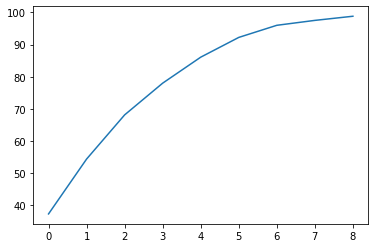

In [56]:
plt.plot(var3)

#### Union of Datasets

In [59]:
features_dim_reducted = pd.DataFrame(my_x[:,:86])

In [61]:
echonest_dim_reducted = pd.DataFrame(my_y[:,:51])

In [62]:
tracks_dim_reducted = pd.DataFrame(my_z[:,:5])

In [63]:
features_dim_reducted

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,2.682700,-1.972250,-6.945725,4.123950,1.746503,-6.775712,-0.582245,1.560024,-0.299358,3.423910,...,0.263128,-2.338278,-2.537299,1.299347,0.115623,0.140834,0.026486,-1.285550,-0.109417,1.354543
1,4.549089,-4.679155,-4.245711,-3.105409,1.484379,1.791329,4.217955,4.544034,-1.989591,3.750287,...,0.023735,-1.814230,-0.628482,-0.832100,-0.828183,-0.429277,0.124609,-1.142251,0.602837,1.162507
2,1.182898,-2.884530,-3.374715,-1.301857,2.106521,0.489544,-0.781680,3.433585,-0.171858,1.558286,...,0.620802,0.661088,-0.481225,-0.917649,-0.776730,-1.969174,0.484772,-0.296183,-0.772984,-1.038984
3,6.590843,3.982656,-4.903721,-0.756132,1.156982,1.923529,3.046953,4.977126,-2.099016,2.061654,...,0.038288,0.838781,-0.758957,0.118138,-0.882521,-1.486038,-0.627598,1.155922,2.799098,0.379386
4,2.088385,-6.698105,-2.549170,-1.129361,-0.662274,0.969942,-2.658423,5.864336,0.522216,0.650098,...,-0.413155,0.829020,0.024529,-0.247997,0.557887,0.149272,1.293909,0.198334,0.232534,0.872279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,6.739351,-4.232906,-0.782725,-2.592593,-0.835962,-1.018602,-1.012761,2.696426,0.816244,2.282039,...,0.469437,-0.547121,-0.263778,0.770649,0.661327,0.073393,0.254254,-0.199473,-0.417761,-1.508517
13125,15.975099,-0.179111,-2.460740,6.231222,1.418114,-0.664350,-3.285767,4.680604,-0.128834,-7.635012,...,0.585567,0.124010,-0.428905,0.808688,1.040973,0.857835,0.187047,0.028610,0.764150,-0.120186
13126,18.313394,0.265516,-3.400826,1.468165,3.651854,-4.851886,-2.126458,1.269225,2.994914,-3.379609,...,0.207313,-0.234549,0.259409,0.262819,0.578793,-0.108691,0.060736,0.312732,0.041505,-1.912996
13127,-2.875521,-2.425830,-1.424479,-4.194334,-1.283795,-0.838342,6.240139,-0.235910,-0.973233,0.733885,...,-0.092505,-0.343456,0.478172,-0.193442,0.476918,0.626563,-0.064148,1.067277,0.375564,-0.948332


# 3. Algorithmic questions

You are given a list of integers, A, and another integer s. Write an algorithm that outputs all the pairs in A that equal x.

In [ ]:
def output_pairs(A, s):
    set_of_pairs = set()
    for i in range(len(A)-1):
        for j in range(i+1, len(A)):
            if A[i] + A[j] == s:
                set_of_pairs.add((A[i], A[j]))
                
    if len(set_of_pairs) > 0:
        print("Pair(s) found:\n", set_of_pairs)
    else:
        print("No pair found")

A = [7, -2, 8, 2, 6, 4, -7, 2, 1, 3, -3]
s = 4
 
output_pairs(A, s)